<a href="https://colab.research.google.com/github/KombatBakpen/Deep-Learning-with-Pytorch-/blob/main/Nueral_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

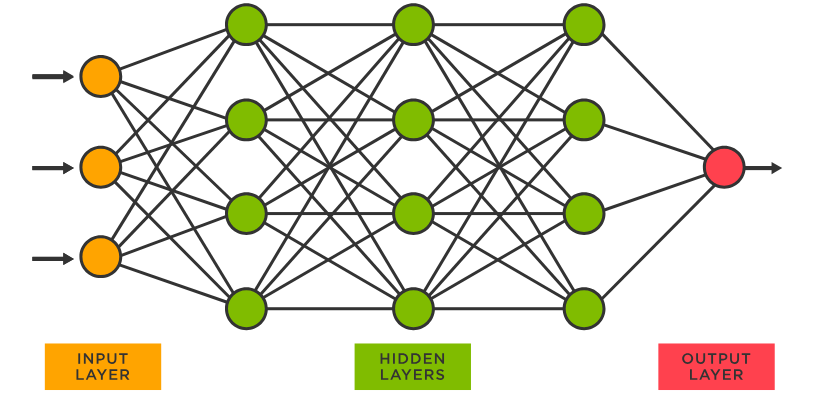

NN consist of interconnected nodes, or artificial neurons, organized into layers. Input data is processed through these layers, with each connection having a weight that adjusts during training to optimize the network's ability to recognize patterns and make accurate predictions. As shown above

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
# Model class
class Model(nn.Module):
  #Input(discriptors) -> H1 -> H2 -> Hn -> output

  def __init__(self, in_features = 4, h1=8, h2=9, out_features = 3):
    super().__init__() #initantiate nn.Module
    self.fc1 = nn.Linear(in_features, h1)
    self.fc2 = nn.Linear(h1, h2)
    self.out = nn.Linear(h2, out_features)

  def forward(self, x):
    x = F.relu(self.fc1(x)) # thus is the moving function. It is what tells the layer to move to another layer
    x = F.relu(self.fc2(x)) # move to layer 2
    x = self.out(x) # push ot output layer

    return x





In [ ]:
# seeding for randomization
torch.manual_seed(41)

# Instantiating the model
model = Model()



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
url = "https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv"
my_df = pd.read_csv(url)
my_df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [ ]:
#Changing the target classes from strings to integers (actually float, hahahahaha)
my_df["variety"] = my_df["variety"].replace("Setosa", 0.0)
my_df["variety"] = my_df["variety"].replace("Versicolor", 1.0)
my_df["variety"] = my_df["variety"].replace("Virginica", 2.0)
my_df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [ ]:
#spliting the data into training and testing dataset

X = my_df.drop("variety", axis = 1)
y = my_df["variety"]


In [ ]:
#convert to numpy arrays

X = X.values
y = y.values
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 41)


In [ ]:
# converting x features to tensors
X_train = torch.FloatTensor(X_train)
X_test= torch.FloatTensor(X_test)

In [ ]:
# converting y feature to tensors; LongTensor
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [ ]:
# Set criterion of the model to measure the error:
# That is how far off is the prediction are from the data

criterion = nn.CrossEntropyLoss()

# Optimizer: Adam, and learning rate(epocs)
optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


Epoch: 0 and loss: 1.125203251838684
Epoch: 10 and loss: 0.47084110975265503
Epoch: 20 and loss: 0.1304941624403
Epoch: 30 and loss: 0.07235170155763626
Epoch: 40 and loss: 0.043187160044908524
Epoch: 50 and loss: 0.03076898492872715
Epoch: 60 and loss: 0.023273862898349762
Epoch: 70 and loss: 0.021723834797739983
Epoch: 80 and loss: 0.020939715206623077
Epoch: 90 and loss: 0.019821371883153915


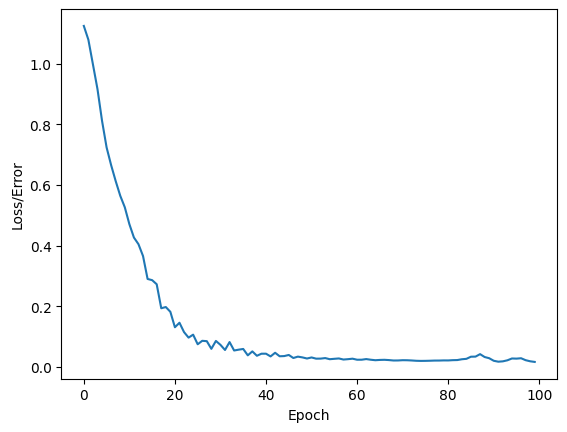

In [ ]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.forward(X_train)

    # Loss/error
    loss = criterion(y_pred, y_train)
    losses.append(loss.item())

    # Print every ten epoch
    if i % 10 == 0:
        print(f"Epoch: {i} and loss: {loss.item()}")

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

# Graphing the losses
plt.plot(range(epochs), losses)
plt.ylabel("Loss/Error")
plt.xlabel("Epoch")
plt.show()

In [ ]:
# Model Evaluation

with torch.no_grad(): # turn  off back propagation
   y_eval = model.forward(X_test)
   loss = criterion(y_eval, y_test )

loss



tensor(0.1993)

In [42]:
correct = 0
with torch.no_grad():
  for i, data in enumerate(X_test):
    y_val = model.forward(data)

    if y_test[i] == 0:
      x = "Setosa"
    elif y_test[i] == 1:
      x = 'Versicolor'
    else:
      x = 'Virginica'

    print(f'{i+1}.)  {str(y_val)} \t {y_test[i]} \t {y_val.argmax().item()}')

    # Correct or not
    if y_val.argmax().item() == y_test[i]:
      correct +=1

print(f'We got {correct} correct!')

1.)  tensor([-10.9325,   4.9479,  -0.1627]) 	 1 	 1
2.)  tensor([ 11.4174,   3.0371, -14.1089]) 	 0 	 0
3.)  tensor([ 11.1374,   2.9560, -13.7610]) 	 0 	 0
4.)  tensor([-12.0051,   5.2487,   0.0901]) 	 1 	 1
5.)  tensor([-22.2085,   4.5177,   7.0639]) 	 2 	 2
6.)  tensor([-24.8464,   5.5572,   7.3377]) 	 2 	 2
7.)  tensor([ 10.8981,   2.8868, -13.4637]) 	 0 	 0
8.)  tensor([ 11.0790,   2.9391, -13.6885]) 	 0 	 0
9.)  tensor([-10.2712,   5.1880,  -0.8759]) 	 1 	 1
10.)  tensor([ 11.5532,   3.0763, -14.2775]) 	 0 	 0
11.)  tensor([-12.4316,   5.4715,   0.1118]) 	 1 	 1
12.)  tensor([-28.0065,   3.9714,  11.1067]) 	 2 	 2
13.)  tensor([-6.3181,  4.2503, -2.2742]) 	 1 	 1
14.)  tensor([-5.2622,  4.6249, -3.6969]) 	 1 	 1
15.)  tensor([-23.9445,   4.3702,   8.2367]) 	 2 	 2
16.)  tensor([-27.8125,   3.4781,  11.6135]) 	 2 	 2
17.)  tensor([-12.6627,   4.7358,   1.1021]) 	 1 	 1
18.)  tensor([-21.1312,   4.4004,   6.5460]) 	 2 	 2
19.)  tensor([-6.3971,  4.5974, -2.7707]) 	 1 	 1
20.)  tenso

**Evaluating on new data point** **bold text**

In [47]:
new_iris = torch.tensor([4.7, 3.2, 1.3, 0.2])
with torch.no_grad():
  print(model(new_iris))

tensor([ 11.0403,   2.9279, -13.6404])


In [49]:
newer_iris = torch.tensor([5.9, 3.0, 5.1, 1.8])
with torch.no_grad():
  print(model(newer_iris))

tensor([-21.4849,   4.2786,   6.8847])


**Saving the model**

In [51]:
# saving
torch.save(model.state_dict(), "iris_prodiction_using_NN.pt")

In [52]:
#load the model back

new_model = Model()
new_model = Model()
new_model.load_state_dict(torch.load("iris_prodiction_using_NN.pt"))

<All keys matched successfully>

In [54]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=9, bias=True)
  (out): Linear(in_features=9, out_features=3, bias=True)
)